# **Maestr√≠a en Inteligencia Artificial Aplicada**

## **Curso: Inteligencia Artificial y Aprendizaje Autom√°tico**

#### Tecnol√≥gico de Monterrey

#### Prof Luis Eduardo Falc√≥n Morales

### Adtividad de Semanas 6 y 7

### **Campa√±as publicitarias en redes sociales - Modelos de Regresi√≥n**



### **Nombre y Matr√≠cula de integrantes del Equipo:**


*   Elemento de lista
*   Elemento de lista
*   Elemento de lista


# **Introducci√≥n**

### **Trabajaremos con el archivo "dataset_Facebook.csv" que encuentras en la siguiente liga:**

https://archive.ics.uci.edu/dataset/368/facebook+metrics

### **Estos datos est√°n asociados al siguiente art√≠culo que apareci√≥ en la revista *Journal of Business Research*, Moro et.al., de la editorial ELSEVIER. Descarga el archivo en formato PDF, el cual te ayudar√° a responder algunas de las preguntas de esta actividad (el art√≠culo tiene acceso sin costo):**

https://www.semanticscholar.org/paper/Predicting-social-media-performance-metrics-and-of-Moro-Rita/dec55692590820754b53c916e29bb2b42c0e5104


### **En el resto de la actividad pueden agregar m√°s celdas y l√≠neas de c√≥digo cuando as√≠ lo consideren adecuado.**

In [1]:
# Incluir las librer√≠as que consideren necesarias ...

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

np.random.seed(0)

from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
import shap

plt.style.use('seaborn-v0_8')

c:\Coding\Masters\AI-ML\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Cargamos los datos del archivo:

data_path = Path('facebook+metrics/dataset_Facebook.csv')
if not data_path.exists():
    data_path = Path('Week 6') / 'facebook+metrics' / 'dataset_Facebook.csv'

data = pd.read_csv(data_path, sep=';', header='infer')
print('Total de registros y variables:', data.shape)
data.head(3).T

Total de registros y variables: (500, 19)


0       1       2
Page total likes                                    139441  139441  139441
Type                                                 Photo  Status   Photo
Category                                                 2       2       3
Post Month                                              12      12      12
Post Weekday                                             4       3       3
Post Hour                                                3      10       3
Paid                                                   0.0     0.0     0.0
Lifetime Post Total Reach                             2752   10460    2413
Lifetime Post Total Impressions                       5091   19057    4373
Lifetime Engaged Users                                 178    1457     177
Lifetime Post Consumers                                109    1361     113
Lifetime Post Consumptions                             159    1674     154
Lifetime Post Impressions by people who have li...    3078   11710    2812
Lifetime Post reach by people who like your Page      1640    6112    1503
Lifetime People who have liked your Page and en...     119    1108     132
comment                                                  4       5       0
like                                                  79.0   130.0    66.0
share                                                 17.0    29.0    14.0
Total Interactions                                     100     164      80

# **Ejercicio 1**


### **Contesta las siguientes preguntas bas√°ndote en la informaci√≥n del art√≠culo de Moro et.al.**



## **Ejercicio 1-a:**

*   **¬øCu√°l es el problema y el objetivo a resolver que se describe en el art√≠culo?**  

### ++++++++ Inicia la secci√≥n de agregar texto: +++++++++++

El problema es predecir el desempe√±o de publicaciones en redes sociales (espec√≠ficamente Facebook) en t√©rminos de m√©tricas como alcance, engagement e interacciones. El objetivo es ayudar a los administradores de redes sociales a optimizar sus estrategias de contenido mediante la predicci√≥n de qu√© caracter√≠sticas de las publicaciones (tipo, categor√≠a, momento de publicaci√≥n, si es paga o no) generar√°n mayor impacto en los consumidores de contenido.

### ++++++++ Termina la secci√≥n de agregar texto. +++++++++++

## **Ejercicio 1-b:**

*   **Describe a continuaci√≥n el significado de las 19 variables de acuerdo a la informaci√≥n de las Tablas 1, 2 y 3 del art√≠culo.**

### ++++++++ Inicia la secci√≥n de agregar texto: +++++++++++

1. **Page total likes:** N√∫mero total de "me gusta" que tiene la p√°gina de Facebook al momento de la publicaci√≥n.
2. **Type:** Tipo de contenido de la publicaci√≥n (Foto, Video, Link, Estado).
3. **Category:** Categor√≠a del contenido de la publicaci√≥n (acci√≥n, producto, inspiraci√≥n).
4. **Post Month:** Mes en que se public√≥ el contenido (1-12).
5. **Post Weekday:** D√≠a de la semana en que se public√≥ (1-7).
6. **Post Hour:** Hora del d√≠a en que se public√≥ (0-23).
7. **Paid:** Indicador binario si la publicaci√≥n fue promocionada (paga) o no.
8. **Lifetime Post Total Reach:** N√∫mero total de personas que vieron la publicaci√≥n.
9. **Lifetime Post Total Impressions:** N√∫mero total de veces que la publicaci√≥n fue mostrada.
10. **Lifetime Engaged Users:** N√∫mero de usuarios que interactuaron con la publicaci√≥n.
11. **Lifetime Post Consumers:** N√∫mero de personas que hicieron clic en la publicaci√≥n.
12. **Lifetime Post Consumptions:** N√∫mero total de clics en la publicaci√≥n.
13. **Lifetime Post Impressions by people who have liked your Page:** Impresiones entre seguidores de la p√°gina.
14. **Lifetime Post reach by people who like your Page:** Alcance entre seguidores de la p√°gina.
15. **Lifetime People who have liked your Page and engaged with your post:** Seguidores que interactuaron con la publicaci√≥n.
16. **comment:** N√∫mero de comentarios en la publicaci√≥n.
17. **like:** N√∫mero de "me gusta" en la publicaci√≥n.
18. **share:** N√∫mero de veces que se comparti√≥ la publicaci√≥n.
19. **Total Interactions:** Suma total de comentarios, me gusta y compartidos.

### ++++++++ Termina la secci√≥n de agregar texto. +++++++++++

# **Ejercicio 2**

### **Variables relacionadas con el tiempo**

### **Recordemos que algunas variables relacionadas con informaci√≥n del tiempo (como estaci√≥n, mes, d√≠a, hora) pueden considerarse como variables categ√≥ricas o num√©ricas c√≠clicas, dependiendo del contexto y decisi√≥n del analista. En particular, para el caso de este problema las variables mes, d√≠a de la semana y hora en que se puso el post, podr√≠an considerarse como variables categ√≥ricas ordinales o nominales. Sin embargo, para fines de este Actividad las van a transformar a num√©ricas c√≠clicas, como se les indica a continuaci√≥n.**

### **En la Tabla 3 del art√≠culo de ELSEVIER nos comentan que la variable *Post_hour* est√° etiquetada de 0 a 23, por lo que las 24 horas ser√≠a equivalente a las 0 horas. Es decir, se tiene un comportamiento c√≠clico de 24 horas, que en t√©rminos matem√°ticos se dice que es una variable c√≠clica m√≥dulo 24. De manera an√°loga se aplica este razonamiento a las variables mes y d√≠a de la semana para poder ser consideradas como c√≠clicas.**

### **En la misma Tabla 3 del art√≠culo se menciona que las variables *Post_month* y *Post_hour* est√°n registradas con los nombres de los meses y de cada d√≠a de la semana. Sin embargo, en el archivo en realidad se observa que est√°n capturadas como num√©ricas del 1 al 12 y del 1 al 7, respectivamente.**


## **Ejercicio 2-a:**

* **Investiga y escribe a continuaci√≥n las f√≥rmulas de c√≥mo se transforma una variable temporal c√≠clica T, de periodicidad M, en dos nuevas variables usando funciones trigonom√©tricas.**  

### ++++++++ Inicia la secci√≥n de agregar texto: +++++++++++

Para transformar una variable c√≠clica T con periodicidad M en dos nuevas variables usando funciones trigonom√©tricas, se utilizan las siguientes f√≥rmulas:

$$T_{sin} = \sin\left(\frac{2\pi \cdot T}{M}\right)$$

$$T_{cos} = \cos\left(\frac{2\pi \cdot T}{M}\right)$$

Donde:
- $T$ es el valor de la variable temporal original
- $M$ es el per√≠odo de la variable (por ejemplo, 24 para horas, 7 para d√≠as de la semana, 12 para meses)
- $2\pi$ representa una vuelta completa en radianes

### ++++++++ Termina la secci√≥n de agregar texto. +++++++++++

## **Ejercicio 2-b:**

* **Explica por qu√© deben utilizarse dos funciones trigonom√©tricas en la transformaci√≥n de variables c√≠clicas, en lugar de solo una. Incluye un ejemplo num√©rico cualquiera que ayude a clarificar tu respuesta.**

### ++++++++ Inicia la secci√≥n de agregar texto: +++++++++++

Se utilizan dos funciones trigonom√©tricas (seno y coseno) en lugar de una sola porque se necesita representar de forma √∫nica cada punto en el ciclo. Una sola funci√≥n trigonom√©trica es ambigua.

**Ejemplo num√©rico:** Consideremos las horas del d√≠a (per√≠odo M=24):
- Hora 3: sin(2œÄ¬∑3/24) ‚âà 0.707, cos(2œÄ¬∑3/24) ‚âà 0.707
- Hora 9: sin(2œÄ¬∑9/24) ‚âà 0.707, cos(2œÄ¬∑9/24) ‚âà -0.707

Si solo us√°ramos seno, las horas 3 y 9 tendr√≠an el mismo valor (‚âà0.707), cuando en realidad son horas diferentes con comportamientos distintos. Al usar ambas funciones, el par (sin, cos) identifica de manera √∫nica cada hora: (0.707, 0.707) vs (0.707, -0.707).

Adem√°s, seno y coseno juntos preservan la distancia c√≠clica: la hora 23 est√° cerca de la hora 0, y esto se refleja en que sus representaciones (sin, cos) est√°n pr√≥ximas en el espacio 2D.

### ++++++++ Termina la secci√≥n de agregar texto. +++++++++++

## **Ejercicio 2-c:**

* **Una vez transformada una variable temporal con las dos funciones trigonom√©tricas, cu√°l ser√≠a la recomendaci√≥n para esta variable original, ¬øseguirla manteniendo en el DataFrame o eliminarla? Justifica tu respuesta.**

### ++++++++ Inicia la secci√≥n de agregar texto: +++++++++++

**Recomendaci√≥n: Eliminar la variable original del DataFrame.**

**Justificaci√≥n:**
1. **Evitar redundancia:** Las dos variables transformadas (sin y cos) ya contienen toda la informaci√≥n de la variable original, pero en un formato m√°s apropiado para modelos de ML.

2. **Prevenir confusi√≥n del modelo:** Si se mantiene la variable original num√©rica (por ejemplo, mes=12), el modelo podr√≠a interpretarla incorrectamente como una escala ordinal donde diciembre (12) est√° "m√°s lejos" de enero (1) que de noviembre (11), cuando en realidad diciembre est√° adyacente a enero en el calendario.

3. **Reducir dimensionalidad:** Mantener tres variables (original + sin + cos) aumenta innecesariamente la dimensionalidad sin aportar informaci√≥n adicional.

4. **Consistencia:** Si el objetivo era capturar la naturaleza c√≠clica, la representaci√≥n original lineal contradice esta intenci√≥n.

### ++++++++ Termina la secci√≥n de agregar texto. +++++++++++

## **Ejercicio 2-d:**

* **Enumera al menos tres ventajas y tres desventajas de usar una representaci√≥n de las variables temporales en t√©rminos de dos funciones trigonom√©tricas.**

### ++++++++ Inicia la secci√≥n de agregar texto: +++++++++++

**Ventajas:**
1. **Captura de ciclicidad:** Representa correctamente que valores extremos est√°n pr√≥ximos (hora 23 cerca de hora 0).
2. **Mejor rendimiento en modelos lineales:** Facilita que modelos lineales capturen patrones c√≠clicos que de otra forma requerir√≠an interacciones polinomiales complejas.
3. **Preservaci√≥n de distancias:** Mantiene la similitud entre valores temporales cercanos en el ciclo.

**Desventajas:**
1. **P√©rdida de interpretabilidad:** Es menos intuitivo explicar que "hora_sin = 0.5" que decir "hora 2 de la tarde".
2. **Aumento de dimensionalidad:** Cada variable temporal se convierte en dos, lo que puede ser problem√°tico con muchas variables c√≠clicas.
3. **Asunci√≥n de periodicidad perfecta:** Asume que el patr√≥n se repite exactamente cada ciclo, lo cual puede no ser cierto (por ejemplo, diciembre tiene comportamiento √∫nico por festividades que no se repite en enero).

### ++++++++ Termina la secci√≥n de agregar texto. +++++++++++

## **Ejercicio 2-e:**

* **¬øQu√© riesgos √©ticos podr√≠an estar surgiendo en un problema si no se representa correctamente una variable temporal? Responde con base al contexto de este problema e incluye otro ejemplo donde tambi√©n pudiera existir un problema √©tico al no transformar adecuadamente una variable c√≠clica.**

### ++++++++ Inicia la secci√≥n de agregar texto: +++++++++++

**Riesgos √©ticos en este problema:**
Si no se representa correctamente la hora de publicaci√≥n, el modelo podr√≠a recomendar publicar a horas inapropiadas o sub√≥ptimas. Por ejemplo, si se trata hora=23 como "m√°s lejana" de hora=1 que de hora=21, podr√≠a recomendar publicaciones nocturnas cuando la audiencia objetivo est√° durmiendo, desperdiciando recursos publicitarios del cliente y generando frustraci√≥n.

**Otro ejemplo - Sistema de salud:**
En un modelo que predice riesgo de ataques card√≠acos seg√∫n la hora del d√≠a, no representar correctamente la ciclicidad podr√≠a fallar en detectar que hay picos de riesgo al amanecer (6-9 AM). Si el modelo trata hora=6 como "distante" de hora=23, podr√≠a no capturar que pacientes con s√≠ntomas a las 5-7 AM tienen patrones similares a los de medianoche-2 AM (ambos en periodo de sue√±o/despertar). Esto podr√≠a resultar en falta de alertas tempranas y atenci√≥n inadecuada, poniendo vidas en riesgo por una decisi√≥n t√©cnica aparentemente menor en el preprocesamiento de datos.

### ++++++++ Termina la secci√≥n de agregar texto. +++++++++++

# **Ejercicio 3**

In [3]:
# Ejercicio 3a.

# Transforma la variable "Post Hour" incluyendo las variables
# hour_sin, hour_cos y eliminando la original.

# ++++++++++++++ Incluye aqu√≠ tu c√≥digo ++++++++++++++++++++++++++++++

# La hora tiene periodicidad de 24
data['hora_sin'] = np.sin(2 * np.pi * data['Post Hour'] / 24)
data['hora_cos'] = np.cos(2 * np.pi * data['Post Hour'] / 24)
data = data.drop('Post Hour', axis=1)

hour_sin = data['hora_sin']
hour_cos = data['hora_cos']

# +++++++++++++ Termina secci√≥n de agregar c√≥digo +++++++++++++++++++++

print("Transformaci√≥n de Post Hour completada")
print(f"hora_sin shape: {hour_sin.shape}, hora_cos shape: {hour_cos.shape}")

Transformaci√≥n de Post Hour completada
hora_sin shape: (500,), hora_cos shape: (500,)


In [4]:
# Ejercicio 3b.

# Transforma la variable "Post Weekday" incluyendo las variables
# day_sin, day_cos y eliminando la original.

# ++++++++++++++ Incluye aqu√≠ tu c√≥digo ++++++++++++++++++++++++++++++

# El d√≠a de la semana tiene periodicidad de 7
data['dia_sin'] = np.sin(2 * np.pi * data['Post Weekday'] / 7)
data['dia_cos'] = np.cos(2 * np.pi * data['Post Weekday'] / 7)
data = data.drop('Post Weekday', axis=1)

day_sin = data['dia_sin']
day_cos = data['dia_cos']

# +++++++++++++ Termina secci√≥n de agregar c√≥digo +++++++++++++++++++++

print("Transformaci√≥n de Post Weekday completada")
print(f"dia_sin shape: {day_sin.shape}, dia_cos shape: {day_cos.shape}")

Transformaci√≥n de Post Weekday completada
dia_sin shape: (500,), dia_cos shape: (500,)


In [5]:
# Ejercicio 3c.

# Transforma la variable "Post Month" incluyendo las variables
# month_sin, month_cos y eliminando la original.

# ++++++++++++++ Incluye aqu√≠ tu c√≥digo ++++++++++++++++++++++++++++++

# El mes tiene periodicidad de 12
data['mes_sin'] = np.sin(2 * np.pi * data['Post Month'] / 12)
data['mes_cos'] = np.cos(2 * np.pi * data['Post Month'] / 12)
data = data.drop('Post Month', axis=1)

month_sin = data['mes_sin']
month_cos = data['mes_cos']

# +++++++++++++ Termina secci√≥n de agregar c√≥digo +++++++++++++++++++++

print("Transformaci√≥n de Post Month completada")
print(f"mes_sin shape: {month_sin.shape}, mes_cos shape: {month_cos.shape}")

Transformaci√≥n de Post Month completada
mes_sin shape: (500,), mes_cos shape: (500,)


In [6]:
# Veamos lo que tenemos hasta el momento:
print("Dimensi√≥n del conjunto de datos:",data.shape)
data.head(3).T

Dimensi√≥n del conjunto de datos: (500, 22)


0         1  \
Page total likes                                      139441    139441   
Type                                                   Photo    Status   
Category                                                   2         2   
Paid                                                     0.0       0.0   
Lifetime Post Total Reach                               2752     10460   
Lifetime Post Total Impressions                         5091     19057   
Lifetime Engaged Users                                   178      1457   
Lifetime Post Consumers                                  109      1361   
Lifetime Post Consumptions                               159      1674   
Lifetime Post Impressions by people who have li...      3078     11710   
Lifetime Post reach by people who like your Page        1640      6112   
Lifetime People who have liked your Page and en...       119      1108   
comment                                                    4         5   
like                                                    79.0     130.0   
share                                                   17.0      29.0   
Total Interactions                                       100       164   
hora_sin                                            0.707107       0.5   
hora_cos                                            0.707107 -0.866025   
dia_sin                                            -0.433884  0.433884   
dia_cos                                            -0.900969 -0.900969   
mes_sin                                                 -0.0      -0.0   
mes_cos                                                  1.0       1.0   

                                                           2  
Page total likes                                      139441  
Type                                                   Photo  
Category                                                   3  
Paid                                                     0.0  
Lifetime Post Total Reach                               2413  
Lifetime Post Total Impressions                         4373  
Lifetime Engaged Users                                   177  
Lifetime Post Consumers                                  113  
Lifetime Post Consumptions                               154  
Lifetime Post Impressions by people who have li...      2812  
Lifetime Post reach by people who like your Page        1503  
Lifetime People who have liked your Page and en...       132  
comment                                                    0  
like                                                    66.0  
share                                                   14.0  
Total Interactions                                        80  
hora_sin                                            0.707107  
hora_cos                                            0.707107  
dia_sin                                             0.433884  
dia_cos                                            -0.900969  
mes_sin                                                 -0.0  
mes_cos                                                  1.0

In [7]:
# De las Tablas 2 y 3 del art√≠culo de Moro et.al. seleccionamos las variables que
# trabajaremos en esta Actividad y con las transformaciones que se acaban de hacer.

# Para esta Actividad se trabajar√° con la variable de salida "Lifetime Post Consumers",
# que es una de las variables de salida con las que los autores del art√≠culo
# reportaron que obtuvieron uno de los mejores resultados.

X = data[['Page total likes', 'Type', 'Category', 'Paid',
          'mes_sin', 'mes_cos', 'dia_sin', 'dia_cos', 'hora_sin', 'hora_cos']]
y = data[['Lifetime Post Consumers']]

# Particionemos como se indica a continuaci√≥n en Train, Val y Test:
Xtrain, Xtv, ytrain, ytv = train_test_split(X, y, train_size=0.75, shuffle=True, random_state=5)
Xval, Xtest, yval, ytest = train_test_split(Xtv, ytv, train_size=0.5, shuffle=True, random_state=5)

print('Train:', Xtrain.shape, ytrain.shape)
print('Train:', Xval.shape, yval.shape)
print('Test:', Xtest.shape, ytest.shape)

Train: (375, 10) (375, 1)
Train: (62, 10) (62, 1)
Test: (63, 10) (63, 1)


# **Ejercicio 4**

* **Realiza un an√°lisis de la variable de salida y aplicarle la transformaci√≥n que consideres m√°s adecuada a los conjuntos Train, Val y Test. A las nuevas variables llamarlas ytrain2, yval2 y ytest2.**

An√°lisis de la variable de salida 'Lifetime Post Consumers':
       Lifetime Post Consumers
count               375.000000
mean                825.200000
std                 967.721545
min                   9.000000
25%                 323.500000
50%                 547.000000
75%                 994.500000
max               11328.000000

Asimetr√≠a (skewness): 4.934992317806204
Curtosis: 40.6638074809451


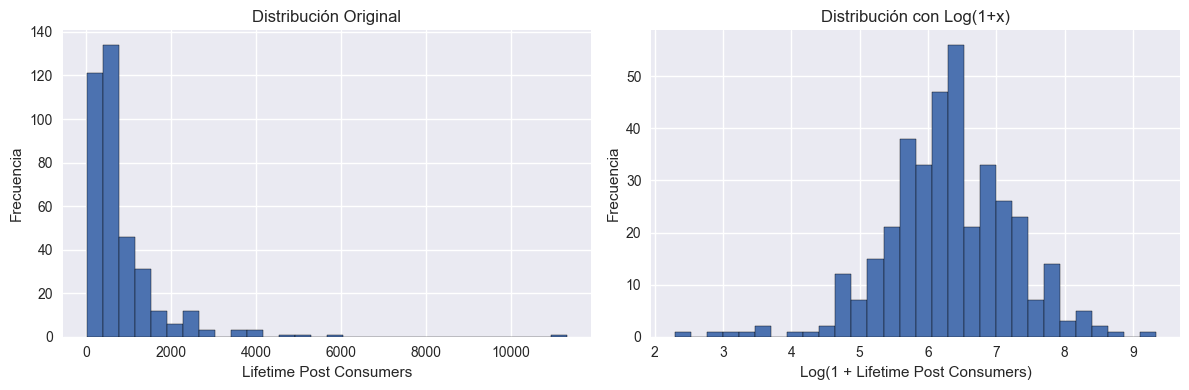


Despu√©s de transformaci√≥n log1p:
Asimetr√≠a: -0.38264465249809926
Curtosis: 1.6919360434817694


In [8]:
# Ejercicio 4.

# ++++++++++++++ Inicia secci√≥n de agregar c√≥digo +++++++++++++++++++

# Primero analicemos la distribuci√≥n de la variable de salida
print("An√°lisis de la variable de salida 'Lifetime Post Consumers':")
print(ytrain.describe())
print("\nAsimetr√≠a (skewness):", ytrain['Lifetime Post Consumers'].skew())
print("Curtosis:", ytrain['Lifetime Post Consumers'].kurtosis())

# Visualizaci√≥n
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Histograma original
axes[0].hist(ytrain['Lifetime Post Consumers'], bins=30, edgecolor='black')
axes[0].set_title('Distribuci√≥n Original')
axes[0].set_xlabel('Lifetime Post Consumers')
axes[0].set_ylabel('Frecuencia')

# Histograma con transformaci√≥n logar√≠tmica
axes[1].hist(np.log1p(ytrain['Lifetime Post Consumers']), bins=30, edgecolor='black')
axes[1].set_title('Distribuci√≥n con Log(1+x)')
axes[1].set_xlabel('Log(1 + Lifetime Post Consumers)')
axes[1].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

# La variable tiene distribuci√≥n muy sesgada (skewed), aplicamos transformaci√≥n logar√≠tmica
ytrain2 = np.log1p(ytrain)  # log1p es log(1+x) para evitar log(0)
yval2 = np.log1p(yval)
ytest2 = np.log1p(ytest)

print("\nDespu√©s de transformaci√≥n log1p:")
print("Asimetr√≠a:", ytrain2['Lifetime Post Consumers'].skew())
print("Curtosis:", ytrain2['Lifetime Post Consumers'].kurtosis())

# ++++++++++++++ Termina secci√≥n de agregar c√≥digo ++++++++++++++++++

# **Ejercicio 5**

* **En la Figura 5 del art√≠culo de Moro et.al. se indica que no se cuenta con un valor de partida para el modelo base (Baseline) de acuerdo a la experiencia que se tiene del problema y en particular con respecto a la m√©trica MAPE.**

* **Sin embargo, para fines de esta actividad y ya que utilizaremos las curvas de aprendizaje, nos basaremos en el error cuadr√°tico medio MSE, para supervisar que nuestros modelos no queden sub-entrenados o sobre-entrenados durante el entrenamiento.**


In [9]:
# Ejercicio 5

# Obtener el umbral del problema a resolver con base a la m√©trica MSE
# y a la variable de salida con la transformaci√≥n aplicada.
# Llamar "mse_baseline" al valor de dicho umbral.

# ++++++++++++++ Inicia secci√≥n de agregar c√≥digo +++++++++++++++++++

# Para obtener el baseline, usamos el promedio como predicci√≥n
# y calculamos el MSE en el conjunto de validaci√≥n

baseline_prediction = ytrain2.mean()
mse_baseline = mean_squared_error(yval2, np.full(yval2.shape, baseline_prediction))

# ++++++++++++++ Termina secci√≥n de agregar c√≥digo +++++++++++++++++++

# Imprimimos el valor de la m√©trica MSE del modelo base:
print(f"MSE Baseline (promedio) con Y transformada: {mse_baseline:.2f}")

MSE Baseline (promedio) con Y transformada: 0.68


# **Ejercicio 6**

* **Realiza un an√°lisis de las variables de entrada y determina qu√© transformaciones ser√≠a adecuado aplicar a cada una. En particular, para las variables categ√≥ricas verifica si cada nivel cumple el criterio de tener al menos un 5% de informaci√≥n.**

NOTA: Se aplicar√° posteriormente un Pipeline para conjuntar las transformaciones de las variables de entrada, por lo que por el momento no es necesario transformar los datos de los conjuntos Val y Test.

In [10]:
# Ejercicio 6

# An√°lisis de variables

# ++++++++++++++ Inicia secci√≥n de agregar c√≥digo +++++++++++++++++++

print("=== AN√ÅLISIS DE VARIABLES DE ENTRADA ===\n")

# Identificar variables num√©ricas y categ√≥ricas
numerical_cols = ['Page total likes', 'mes_sin', 'mes_cos', 'dia_sin', 'dia_cos', 'hora_sin', 'hora_cos']
categorical_cols = ['Type', 'Category', 'Paid']

print("Variables num√©ricas:", numerical_cols)
print("Variables categ√≥ricas:", categorical_cols)
print("\n")

# An√°lisis de variables categ√≥ricas - verificar criterio del 5%
print("=== AN√ÅLISIS DE VARIABLES CATEG√ìRICAS ===")
for col in categorical_cols:
    print(f"\n{col}:")
    freq = Xtrain[col].value_counts(normalize=True)
    print(freq.to_frame(name='Proporci√≥n'))
    
    # Verificar si alg√∫n nivel tiene menos del 5%
    rare_levels = freq[freq < 0.05]
    if len(rare_levels) > 0:
        print(f"  ‚ö†Ô∏è Niveles con <5%: {list(rare_levels.index)}")
    else:
        print(f"  ‚úì Todos los niveles tienen ‚â•5%")

# An√°lisis de variables num√©ricas
print("\n\n=== AN√ÅLISIS DE VARIABLES NUM√âRICAS ===")
print(Xtrain[numerical_cols].describe().T)

print("\n=== DECISIONES DE TRANSFORMACI√ìN ===")
print("1. Variables num√©ricas continuas: Aplicar StandardScaler (Page total likes)")
print("2. Variables trigonom√©tricas (sin/cos): Ya est√°n en [-1,1], no necesitan escalado")
print("3. Variables categ√≥ricas: Aplicar OneHotEncoder")
print("4. Paid: Es binaria (0/1), puede tratarse como categ√≥rica con OHE")

# ++++++++++++++ Termina secci√≥n de agregar c√≥digo ++++++++++++++++++

=== AN√ÅLISIS DE VARIABLES DE ENTRADA ===

Variables num√©ricas: ['Page total likes', 'mes_sin', 'mes_cos', 'dia_sin', 'dia_cos', 'hora_sin', 'hora_cos']
Variables categ√≥ricas: ['Type', 'Category', 'Paid']


=== AN√ÅLISIS DE VARIABLES CATEG√ìRICAS ===

Type:
        Proporci√≥n
Type              
Photo     0.850667
Status    0.093333
Link      0.040000
Video     0.016000
  ‚ö†Ô∏è Niveles con <5%: ['Link', 'Video']

Category:
          Proporci√≥n
Category            
1           0.421333
3           0.314667
2           0.264000
  ‚úì Todos los niveles tienen ‚â•5%

Paid:
      Proporci√≥n
Paid            
0.0     0.700535
1.0     0.299465
  ‚úì Todos los niveles tienen ‚â•5%


=== AN√ÅLISIS DE VARIABLES NUM√âRICAS ===
                  count           mean           std           min  \
Page total likes  375.0  123466.202667  16150.793818  81370.000000   
mes_sin           375.0      -0.065142      0.683375     -1.000000   
mes_cos           375.0      -0.017403      0.728775     -1.

# **Ejercicio 7**

* **Define a continuaci√≥n las transformaciones de las variables de entrada que determinaste son las m√°s adecuadas y usando la clase Pipeline para evitar el filtrado de informaci√≥n.**

In [11]:
# Ejercicio 7

# Incluye a continuaci√≥n las transformaciones a las variables num√©ricas
# y categ√≥ricas usando la clase Pipeline y conjuntando todas en la
# variable que llamaremos "columnasTransformer".

# ++++++++++++++ Inicia secci√≥n de agregar c√≥digo +++++++++++++++++++

# Variables a escalar (solo Page total likes necesita escalado)
numeric_to_scale = ['Page total likes']

# Variables trigonom√©tricas que ya est√°n en [-1, 1]
numeric_passthrough = ['mes_sin', 'mes_cos', 'dia_sin', 'dia_cos', 'hora_sin', 'hora_cos']

# Variables categ√≥ricas
categorical_features = ['Type', 'Category', 'Paid']

# Crear el ColumnTransformer
columnasTransformer = ColumnTransformer(
    transformers=[
        ('num_scaler', StandardScaler(), numeric_to_scale),
        ('num_passthrough', 'passthrough', numeric_passthrough),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features)
    ],
    remainder='drop'
)

# ++++++++++++++ Termina secci√≥n de agregar c√≥digo +++++++++++++++++++

# Visualicemos las transformaciones inclu√≠das:
columnasTransformer

ColumnTransformer(transformers=[('num_scaler', StandardScaler(),
                                 ['Page total likes']),
                                ('num_passthrough', 'passthrough',
                                 ['mes_sin', 'mes_cos', 'dia_sin', 'dia_cos',
                                  'hora_sin', 'hora_cos']),
                                ('cat',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore'),
                                 ['Type', 'Category', 'Paid'])])

In [12]:
# A manera de informaci√≥n veamos la dimensi√≥n de las variables transformadas:

tmp = columnasTransformer.fit_transform(Xtrain)
print('Dimensi√≥n de las variables de entrada original:', tmp.shape)
print('Dimensi√≥n de las variables de entrada transformadas:', tmp.shape)

Dimensi√≥n de las variables de entrada original: (375, 14)
Dimensi√≥n de las variables de entrada transformadas: (375, 14)


In [13]:
# Como vamos a utilizar Validaci√≥n Cruzada conjuntemos los conjuntos
# Train y Val en las nuevas variables llamadas Xtrainval y  ytrainval:

Xtrainval = pd.concat([Xtrain, Xval])
ytrainval2 = pd.concat([ytrain2, yval2])


# **Ejercicio 8**

In [14]:
# Ejercicio 8

# Busca los mejores valores de hiperpar√°metros del modelo Bosque Aleatorio.
# Utiliza el mismo valor de la semilla que se indica.

# ++++++++++++++ Incluye aqu√≠ tu c√≥digo ++++++++++++++++++++++++++++++

# Primero, hagamos una b√∫squeda de hiperpar√°metros
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf_search = RandomForestRegressor(random_state=1, n_jobs=-1)

# Crear pipeline temporal para b√∫squeda
pipeline_search = Pipeline([
    ('ct', columnasTransformer),
    ('m', rf_search)
])

# GridSearch
grid_rf = GridSearchCV(
    pipeline_search,
    {'m__' + k: v for k, v in param_grid_rf.items()},
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

print("Buscando mejores hiperpar√°metros para Random Forest...")
grid_rf.fit(Xtrainval, np.ravel(ytrainval2))

print(f"\nMejores par√°metros: {grid_rf.best_params_}")
print(f"Mejor MSE (validaci√≥n cruzada): {-grid_rf.best_score_:.4f}")

# Crear el modelo final con los mejores par√°metros
best_params_rf = {k.replace('m__', ''): v for k, v in grid_rf.best_params_.items()}

modelo_RF = RandomForestRegressor(
    random_state=1,
    n_jobs=-1,
    **best_params_rf
)

# +++++++++++++ Termina secci√≥n de agregar c√≥digo +++++++++++++++++++++

print("\nModelo Random Forest configurado con los mejores hiperpar√°metros")

Buscando mejores hiperpar√°metros para Random Forest...
Fitting 5 folds for each of 24 candidates, totalling 120 fits

Mejores par√°metros: {'m__max_depth': 10, 'm__min_samples_leaf': 2, 'm__min_samples_split': 2, 'm__n_estimators': 100}
Mejor MSE (validaci√≥n cruzada): 0.5550

Modelo Random Forest configurado con los mejores hiperpar√°metros

Mejores par√°metros: {'m__max_depth': 10, 'm__min_samples_leaf': 2, 'm__min_samples_split': 2, 'm__n_estimators': 100}
Mejor MSE (validaci√≥n cruzada): 0.5550

Modelo Random Forest configurado con los mejores hiperpar√°metros


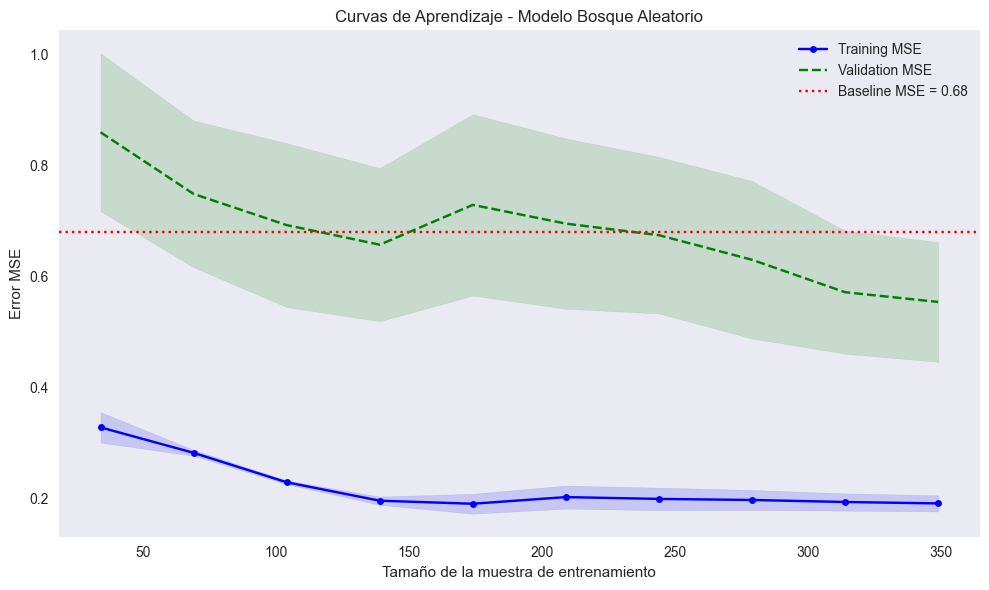


MSE Final en Validaci√≥n: 0.5541
Mejora respecto al baseline: 18.5%


In [15]:
# Generar curvas de aprendizaje para el Random Forest

mipipe = Pipeline(steps=[('ct', columnasTransformer), ('m', modelo_RF)])

train_sizes, train_scores, val_scores = learning_curve(
    estimator=mipipe,
    X=Xtrainval,
    y=np.ravel(ytrainval2),
    cv=5,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

# La siguiente informaci√≥n es para desplegar las curvas de aprendizaje.
# Calculamos los promedios y desviaci√≥n est√°ndar de entrenamiento para MSE.
# El negativo es porque sklearn nos devuelve en realidad el negativo de MSE.

mse_train_scores = -train_scores
mse_val_scores = -val_scores

train_mean = np.mean(mse_train_scores, axis=1)
train_std = np.std(mse_train_scores, axis=1, ddof=1)
val_mean = np.mean(mse_val_scores, axis=1)
val_std = np.std(mse_val_scores, axis=1, ddof=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training MSE')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, val_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation MSE')
plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.15, color='green')

plt.axhline(y=mse_baseline, color='red', linestyle=':', label=f'Baseline MSE = {mse_baseline:.2f}')
plt.title('Curvas de Aprendizaje - Modelo Bosque Aleatorio')
plt.xlabel('Tama√±o de la muestra de entrenamiento')
plt.ylabel('Error MSE')
plt.grid()
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

print(f"\nMSE Final en Validaci√≥n: {val_mean[-1]:.4f}")
print(f"Mejora respecto al baseline: {((mse_baseline - val_mean[-1])/mse_baseline * 100):.1f}%")

# **Ejercicio 9**

### **Repite el mismo proceso hecho en el ejercicio del Bosque Aleatorio para encontrar la mejor versi√≥n de cada uno de los siguientes modelos:**

*   **9a) Extreme Gradient Boost XGBoost**
*   **9b) M√°quina de Vector Soporte SVM**
*   **9c) Red Neuronal Perceptr√≥n Multicapa MLP**

=== XGBOOST MODEL ===

Buscando mejores hiperpar√°metros para XGBoost...
Fitting 5 folds for each of 8 candidates, totalling 40 fits

Mejores par√°metros: {'m__learning_rate': 0.01, 'm__max_depth': 5, 'm__n_estimators': 200}
Mejor MSE (validaci√≥n cruzada): 0.5404

Mejores par√°metros: {'m__learning_rate': 0.01, 'm__max_depth': 5, 'm__n_estimators': 200}
Mejor MSE (validaci√≥n cruzada): 0.5404


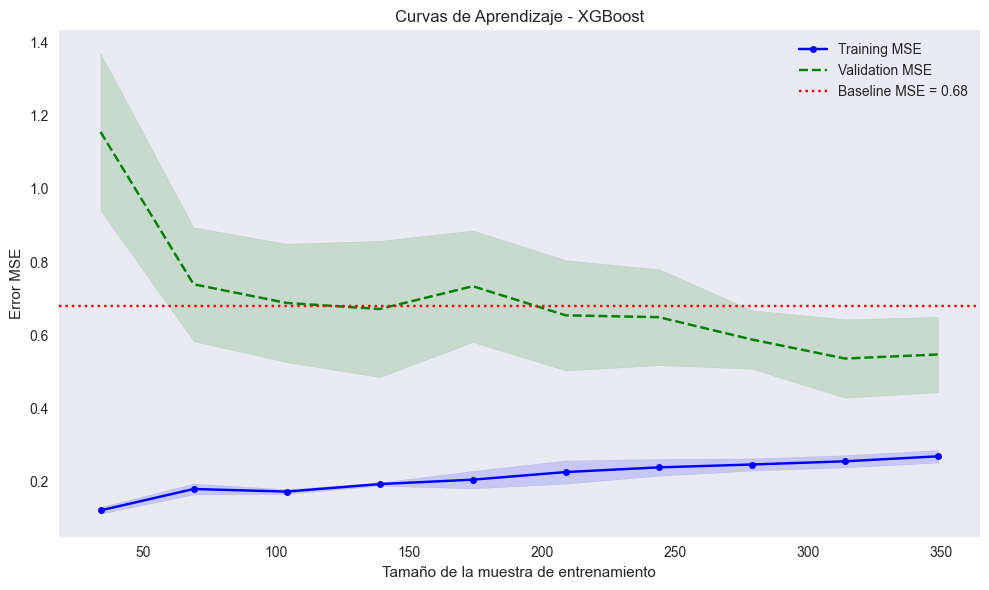


MSE Final en Validaci√≥n (XGBoost): 0.5475
Mejora respecto al baseline: 19.5%


In [17]:
# Ejercicio 9a - XGBoost

# ++++++++++ Incluye las l√≠neas y celdas de c√≥digo deseadas ++++++++++++

print("=== XGBOOST MODEL ===\n")

# B√∫squeda de hiperpar√°metros para XGBoost (reducida para evitar problemas de memoria)
param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1]
}

xgb_search = XGBRegressor(random_state=1, n_jobs=4)

pipeline_xgb = Pipeline([
    ('ct', columnasTransformer),
    ('m', xgb_search)
])

grid_xgb = GridSearchCV(
    pipeline_xgb,
    {'m__' + k: v for k, v in param_grid_xgb.items()},
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=2,
    verbose=1
)

print("Buscando mejores hiperpar√°metros para XGBoost...")
grid_xgb.fit(Xtrainval, np.ravel(ytrainval2))

print(f"\nMejores par√°metros: {grid_xgb.best_params_}")
print(f"Mejor MSE (validaci√≥n cruzada): {-grid_xgb.best_score_:.4f}")

# Modelo con mejores par√°metros
best_params_xgb = {k.replace('m__', ''): v for k, v in grid_xgb.best_params_.items()}
modelo_XGB = XGBRegressor(random_state=1, n_jobs=4, **best_params_xgb)

# Curvas de aprendizaje
pipe_xgb = Pipeline(steps=[('ct', columnasTransformer), ('m', modelo_XGB)])

train_sizes_xgb, train_scores_xgb, val_scores_xgb = learning_curve(
    estimator=pipe_xgb,
    X=Xtrainval,
    y=np.ravel(ytrainval2),
    cv=5,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='neg_mean_squared_error',
    n_jobs=2
)

mse_train_xgb = -train_scores_xgb
mse_val_xgb = -val_scores_xgb
train_mean_xgb = np.mean(mse_train_xgb, axis=1)
train_std_xgb = np.std(mse_train_xgb, axis=1, ddof=1)
val_mean_xgb = np.mean(mse_val_xgb, axis=1)
val_std_xgb = np.std(mse_val_xgb, axis=1, ddof=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes_xgb, train_mean_xgb, color='blue', marker='o', markersize=5, label='Training MSE')
plt.fill_between(train_sizes_xgb, train_mean_xgb + train_std_xgb, train_mean_xgb - train_std_xgb, alpha=0.15, color='blue')
plt.plot(train_sizes_xgb, val_mean_xgb, color='green', marker='+', markersize=5, linestyle='--', label='Validation MSE')
plt.fill_between(train_sizes_xgb, val_mean_xgb + val_std_xgb, val_mean_xgb - val_std_xgb, alpha=0.15, color='green')
plt.axhline(y=mse_baseline, color='red', linestyle=':', label=f'Baseline MSE = {mse_baseline:.2f}')
plt.title('Curvas de Aprendizaje - XGBoost')
plt.xlabel('Tama√±o de la muestra de entrenamiento')
plt.ylabel('Error MSE')
plt.grid()
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

print(f"\nMSE Final en Validaci√≥n (XGBoost): {val_mean_xgb[-1]:.4f}")
print(f"Mejora respecto al baseline: {((mse_baseline - val_mean_xgb[-1])/mse_baseline * 100):.1f}%")

=== SVM MODEL ===

Buscando mejores hiperpar√°metros para SVM...
Fitting 5 folds for each of 4 candidates, totalling 20 fits

Mejores par√°metros: {'m__C': 1, 'm__epsilon': 0.2, 'm__kernel': 'rbf'}
Mejor MSE (validaci√≥n cruzada): 0.5522

Mejores par√°metros: {'m__C': 1, 'm__epsilon': 0.2, 'm__kernel': 'rbf'}
Mejor MSE (validaci√≥n cruzada): 0.5522


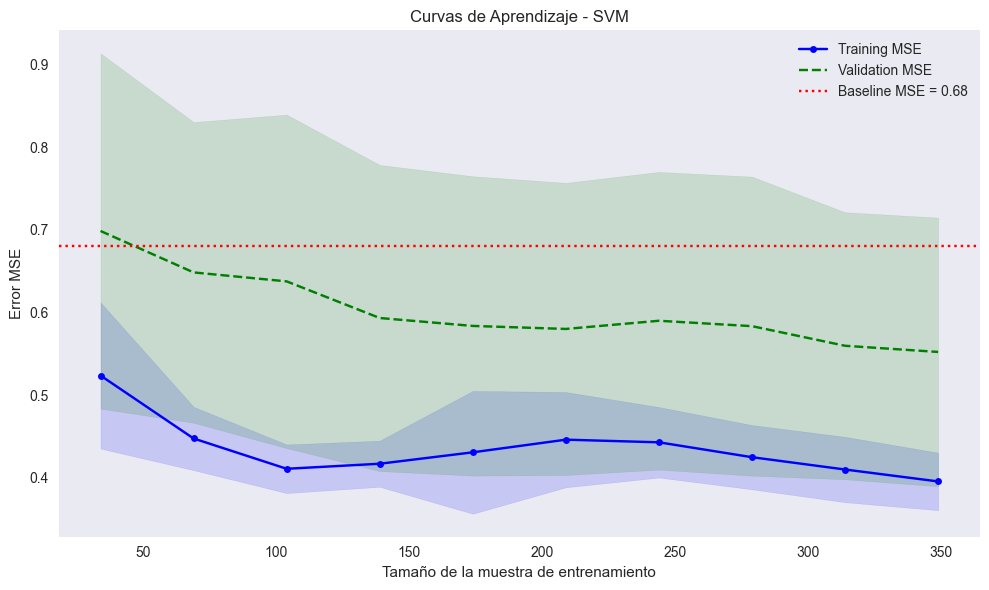


MSE Final en Validaci√≥n (SVM): 0.5522
Mejora respecto al baseline: 18.8%


In [18]:
# Ejercicio 9b - SVM

# ++++++++++ Incluye las l√≠neas y celdas de c√≥digo deseadas ++++++++++++

print("=== SVM MODEL ===\n")

# B√∫squeda de hiperpar√°metros para SVM (reducida)
param_grid_svm = {
    'C': [1, 10],
    'epsilon': [0.1, 0.2],
    'kernel': ['rbf']
}

svm_search = SVR()

pipeline_svm = Pipeline([
    ('ct', columnasTransformer),
    ('m', svm_search)
])

grid_svm = GridSearchCV(
    pipeline_svm,
    {'m__' + k: v for k, v in param_grid_svm.items()},
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=2,
    verbose=1
)

print("Buscando mejores hiperpar√°metros para SVM...")
grid_svm.fit(Xtrainval, np.ravel(ytrainval2))

print(f"\nMejores par√°metros: {grid_svm.best_params_}")
print(f"Mejor MSE (validaci√≥n cruzada): {-grid_svm.best_score_:.4f}")

# Modelo con mejores par√°metros
best_params_svm = {k.replace('m__', ''): v for k, v in grid_svm.best_params_.items()}
modelo_SVM = SVR(**best_params_svm)

# Curvas de aprendizaje
pipe_svm = Pipeline(steps=[('ct', columnasTransformer), ('m', modelo_SVM)])

train_sizes_svm, train_scores_svm, val_scores_svm = learning_curve(
    estimator=pipe_svm,
    X=Xtrainval,
    y=np.ravel(ytrainval2),
    cv=5,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='neg_mean_squared_error',
    n_jobs=2
)

mse_train_svm = -train_scores_svm
mse_val_svm = -val_scores_svm
train_mean_svm = np.mean(mse_train_svm, axis=1)
train_std_svm = np.std(mse_train_svm, axis=1, ddof=1)
val_mean_svm = np.mean(mse_val_svm, axis=1)
val_std_svm = np.std(mse_val_svm, axis=1, ddof=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes_svm, train_mean_svm, color='blue', marker='o', markersize=5, label='Training MSE')
plt.fill_between(train_sizes_svm, train_mean_svm + train_std_svm, train_mean_svm - train_std_svm, alpha=0.15, color='blue')
plt.plot(train_sizes_svm, val_mean_svm, color='green', marker='+', markersize=5, linestyle='--', label='Validation MSE')
plt.fill_between(train_sizes_svm, val_mean_svm + val_std_svm, val_mean_svm - val_std_svm, alpha=0.15, color='green')
plt.axhline(y=mse_baseline, color='red', linestyle=':', label=f'Baseline MSE = {mse_baseline:.2f}')
plt.title('Curvas de Aprendizaje - SVM')
plt.xlabel('Tama√±o de la muestra de entrenamiento')
plt.ylabel('Error MSE')
plt.grid()
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

print(f"\nMSE Final en Validaci√≥n (SVM): {val_mean_svm[-1]:.4f}")
print(f"Mejora respecto al baseline: {((mse_baseline - val_mean_svm[-1])/mse_baseline * 100):.1f}%")

=== MLP (NEURAL NETWORK) MODEL ===

Buscando mejores hiperpar√°metros para MLP...
Fitting 5 folds for each of 4 candidates, totalling 20 fits

Mejores par√°metros: {'m__activation': 'relu', 'm__alpha': 0.0001, 'm__hidden_layer_sizes': (100,)}
Mejor MSE (validaci√≥n cruzada): 0.6335

Mejores par√°metros: {'m__activation': 'relu', 'm__alpha': 0.0001, 'm__hidden_layer_sizes': (100,)}
Mejor MSE (validaci√≥n cruzada): 0.6335


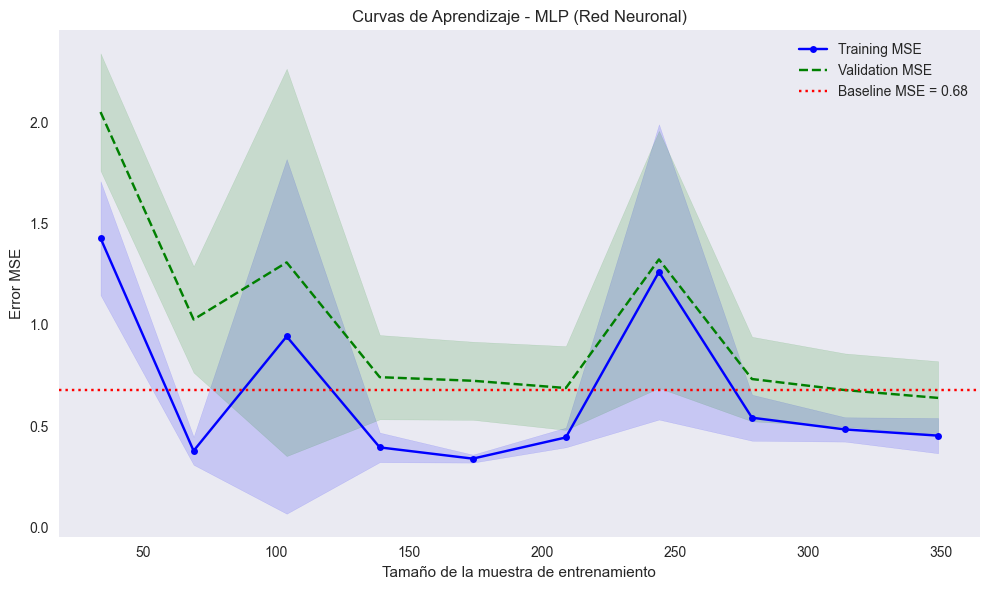


MSE Final en Validaci√≥n (MLP): 0.6396
Mejora respecto al baseline: 5.9%


In [19]:
# Ejercicio 9c - MLP

# ++++++++++ Incluye las l√≠neas y celdas de c√≥digo deseadas ++++++++++++

print("=== MLP (NEURAL NETWORK) MODEL ===\n")

# B√∫squeda de hiperpar√°metros para MLP (reducida)
param_grid_mlp = {
    'hidden_layer_sizes': [(50,), (100,)],
    'activation': ['relu'],
    'alpha': [0.0001, 0.001]
}

mlp_search = MLPRegressor(random_state=1, max_iter=1000, early_stopping=True)

pipeline_mlp = Pipeline([
    ('ct', columnasTransformer),
    ('m', mlp_search)
])

grid_mlp = GridSearchCV(
    pipeline_mlp,
    {'m__' + k: v for k, v in param_grid_mlp.items()},
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=2,
    verbose=1
)

print("Buscando mejores hiperpar√°metros para MLP...")
grid_mlp.fit(Xtrainval, np.ravel(ytrainval2))

print(f"\nMejores par√°metros: {grid_mlp.best_params_}")
print(f"Mejor MSE (validaci√≥n cruzada): {-grid_mlp.best_score_:.4f}")

# Modelo con mejores par√°metros
best_params_mlp = {k.replace('m__', ''): v for k, v in grid_mlp.best_params_.items()}
modelo_MLP = MLPRegressor(random_state=1, max_iter=1000, early_stopping=True, **best_params_mlp)

# Curvas de aprendizaje
pipe_mlp = Pipeline(steps=[('ct', columnasTransformer), ('m', modelo_MLP)])

train_sizes_mlp, train_scores_mlp, val_scores_mlp = learning_curve(
    estimator=pipe_mlp,
    X=Xtrainval,
    y=np.ravel(ytrainval2),
    cv=5,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='neg_mean_squared_error',
    n_jobs=2
)

mse_train_mlp = -train_scores_mlp
mse_val_mlp = -val_scores_mlp
train_mean_mlp = np.mean(mse_train_mlp, axis=1)
train_std_mlp = np.std(mse_train_mlp, axis=1, ddof=1)
val_mean_mlp = np.mean(mse_val_mlp, axis=1)
val_std_mlp = np.std(mse_val_mlp, axis=1, ddof=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes_mlp, train_mean_mlp, color='blue', marker='o', markersize=5, label='Training MSE')
plt.fill_between(train_sizes_mlp, train_mean_mlp + train_std_mlp, train_mean_mlp - train_std_mlp, alpha=0.15, color='blue')
plt.plot(train_sizes_mlp, val_mean_mlp, color='green', marker='+', markersize=5, linestyle='--', label='Validation MSE')
plt.fill_between(train_sizes_mlp, val_mean_mlp + val_std_mlp, val_mean_mlp - val_std_mlp, alpha=0.15, color='green')
plt.axhline(y=mse_baseline, color='red', linestyle=':', label=f'Baseline MSE = {mse_baseline:.2f}')
plt.title('Curvas de Aprendizaje - MLP (Red Neuronal)')
plt.xlabel('Tama√±o de la muestra de entrenamiento')
plt.ylabel('Error MSE')
plt.grid()
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

print(f"\nMSE Final en Validaci√≥n (MLP): {val_mean_mlp[-1]:.4f}")
print(f"Mejora respecto al baseline: {((mse_baseline - val_mean_mlp[-1])/mse_baseline * 100):.1f}%")

=== RESUMEN COMPARATIVO DE MODELOS ===

       Modelo  MSE Validaci√≥n  Mejora vs Baseline (%)
      XGBoost        0.547450               19.497547
          SVM        0.552226               18.795257
Random Forest        0.554097               18.520117
          MLP        0.639605                5.946230
     Baseline        0.680041                0.000000


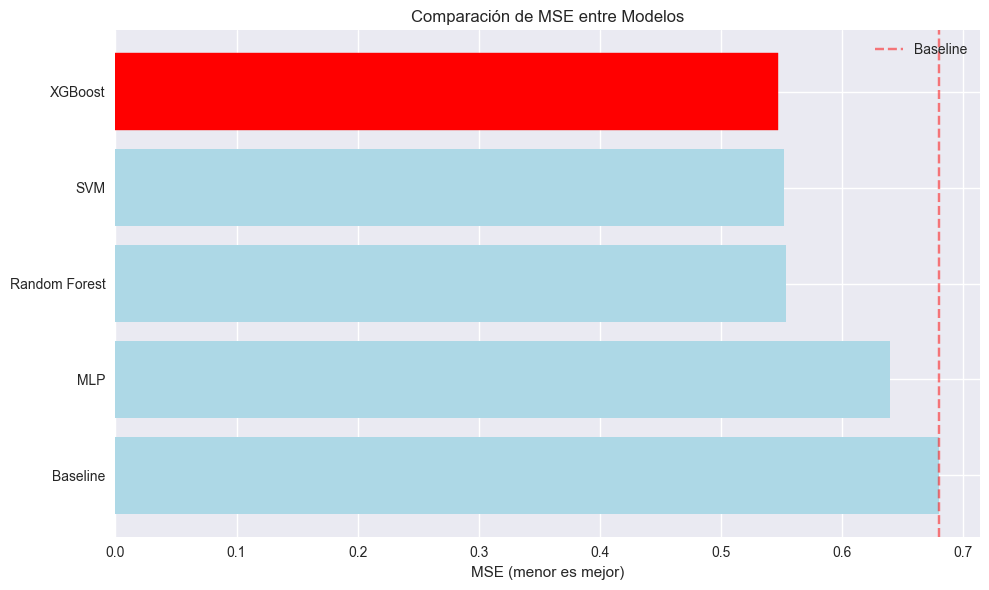


üèÜ Mejor modelo: XGBoost con MSE = 0.5475


In [20]:
# Comparaci√≥n de todos los modelos

print("=== RESUMEN COMPARATIVO DE MODELOS ===\n")

modelos_resumen = {
    'Modelo': ['Baseline', 'Random Forest', 'XGBoost', 'SVM', 'MLP'],
    'MSE Validaci√≥n': [
        mse_baseline,
        val_mean[-1],
        val_mean_xgb[-1],
        val_mean_svm[-1],
        val_mean_mlp[-1]
    ],
    'Mejora vs Baseline (%)': [
        0.0,
        ((mse_baseline - val_mean[-1])/mse_baseline * 100),
        ((mse_baseline - val_mean_xgb[-1])/mse_baseline * 100),
        ((mse_baseline - val_mean_svm[-1])/mse_baseline * 100),
        ((mse_baseline - val_mean_mlp[-1])/mse_baseline * 100)
    ]
}

df_resumen = pd.DataFrame(modelos_resumen)
df_resumen = df_resumen.sort_values('MSE Validaci√≥n')

print(df_resumen.to_string(index=False))

# Visualizaci√≥n
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.barh(df_resumen['Modelo'], df_resumen['MSE Validaci√≥n'], color=['red', 'lightblue', 'lightblue', 'lightblue', 'lightblue'])
bars[0].set_color('red')
ax.set_xlabel('MSE (menor es mejor)')
ax.set_title('Comparaci√≥n de MSE entre Modelos')
ax.axvline(x=mse_baseline, color='red', linestyle='--', alpha=0.5, label='Baseline')
ax.legend()
ax.invert_yaxis()
plt.tight_layout()
plt.show()

print(f"\nüèÜ Mejor modelo: {df_resumen.iloc[0]['Modelo']} con MSE = {df_resumen.iloc[0]['MSE Validaci√≥n']:.4f}")

# **Ejercicio 10**

## **Ejercicio 10-a:**

* **Con la configuraci√≥n del mejor modelo encontrado, realiza un an√°lisis de caracter√≠sticas/factores para determinar qu√© factores ayudan a predecir mejor los valores de la variable de salida.**

=== AN√ÅLISIS DE IMPORTANCIA DE CARACTER√çSTICAS ===

Usando el mejor modelo encontrado: XGBoost

Top 10 caracter√≠sticas m√°s importantes (seg√∫n XGBoost):
                     Feature  Importance
            cat__Type_Status    0.244937
    num_passthrough__mes_cos    0.215657
             cat__Type_Photo    0.104859
             cat__Category_3    0.090409
num_scaler__Page total likes    0.080791
               cat__Paid_1.0    0.056173
    num_passthrough__mes_sin    0.036323
    num_passthrough__dia_sin    0.034519
             cat__Type_Video    0.034382
   num_passthrough__hora_cos    0.031250


C:\Users\Erick\AppData\Local\Temp\ipykernel_23396\1489821915.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_importance_df.head(10), y='Feature', x='Importance', palette='viridis')


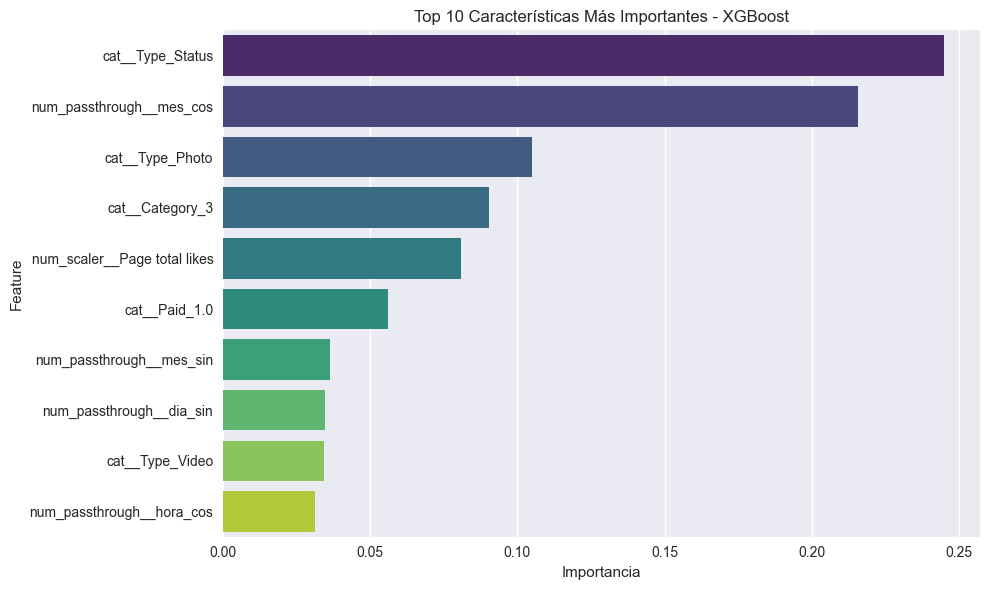


=== AN√ÅLISIS SHAP ===



C:\Users\Erick\AppData\Local\Temp\ipykernel_23396\1489821915.py:46: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_train_transformed, feature_names=feature_names_transformed,


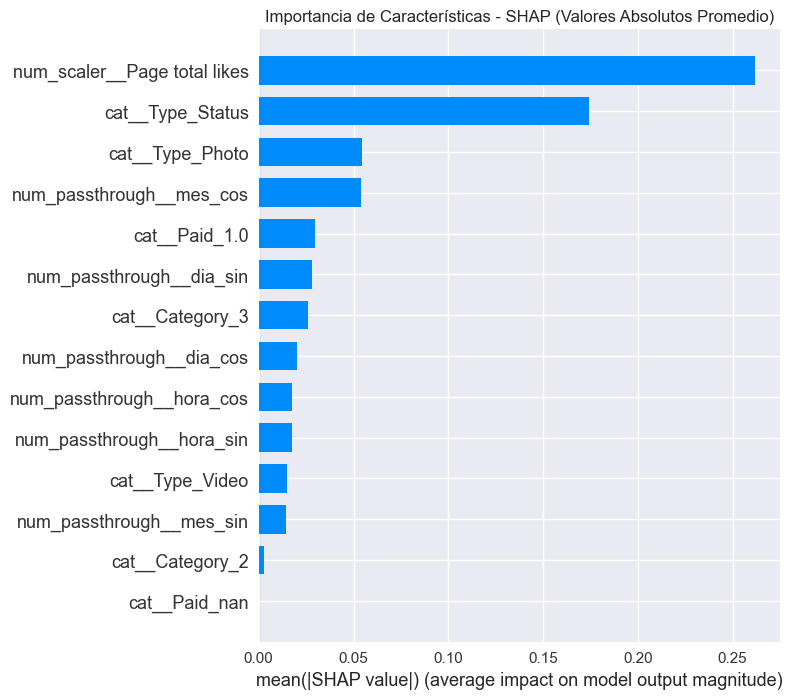

C:\Users\Erick\AppData\Local\Temp\ipykernel_23396\1489821915.py:53: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_train_transformed, feature_names=feature_names_transformed, show=False)


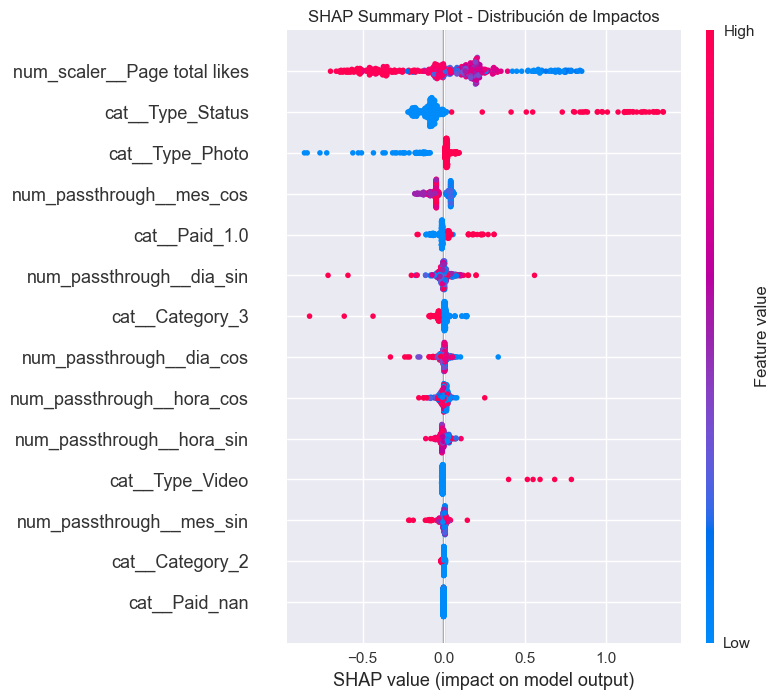


=== EVALUACI√ìN EN CONJUNTO DE PRUEBA ===

MSE en Test: 0.3915
MSE Baseline en Test: 0.68
Mejora respecto al baseline: 42.4%


In [21]:
# Ejercicio 10a

# ++++++++++++++ Inicia secci√≥n de agregar c√≥digo +++++++++++++++++++

print("=== AN√ÅLISIS DE IMPORTANCIA DE CARACTER√çSTICAS ===\n")
print("Usando el mejor modelo encontrado: XGBoost\n")

# Entrenar el modelo final en todo el conjunto de entrenamiento+validaci√≥n
pipe_xgb.fit(Xtrainval, np.ravel(ytrainval2))

# Obtener nombres de caracter√≠sticas despu√©s de la transformaci√≥n
feature_names_transformed = pipe_xgb.named_steps['ct'].get_feature_names_out()

# 1. Feature importances del modelo XGBoost
importances = pipe_xgb.named_steps['m'].feature_importances_

# Crear DataFrame ordenado por importancia
feat_importance_df = pd.DataFrame({
    'Feature': feature_names_transformed,
    'Importance': importances
}).sort_values('Importance', ascending=False)

print("Top 10 caracter√≠sticas m√°s importantes (seg√∫n XGBoost):")
print(feat_importance_df.head(10).to_string(index=False))

# Visualizaci√≥n
plt.figure(figsize=(10, 6))
sns.barplot(data=feat_importance_df.head(10), y='Feature', x='Importance', palette='viridis')
plt.title('Top 10 Caracter√≠sticas M√°s Importantes - XGBoost')
plt.xlabel('Importancia')
plt.tight_layout()
plt.show()

# 2. SHAP values para interpretabilidad
print("\n=== AN√ÅLISIS SHAP ===\n")

# Transformar datos
X_train_transformed = pipe_xgb.named_steps['ct'].transform(Xtrainval)

# Crear explainer
explainer = shap.TreeExplainer(pipe_xgb.named_steps['m'])
shap_values = explainer.shap_values(X_train_transformed)

# SHAP Summary Plot (bar)
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_train_transformed, feature_names=feature_names_transformed, 
                  plot_type='bar', show=False)
plt.title('Importancia de Caracter√≠sticas - SHAP (Valores Absolutos Promedio)')
plt.tight_layout()
plt.show()

# SHAP Summary Plot (beeswarm)
shap.summary_plot(shap_values, X_train_transformed, feature_names=feature_names_transformed, show=False)
plt.title('SHAP Summary Plot - Distribuci√≥n de Impactos')
plt.tight_layout()
plt.show()

# Evaluaci√≥n en conjunto de test
print("\n=== EVALUACI√ìN EN CONJUNTO DE PRUEBA ===\n")
y_test_pred = pipe_xgb.predict(Xtest)
mse_test = mean_squared_error(ytest2, y_test_pred)
print(f"MSE en Test: {mse_test:.4f}")
print(f"MSE Baseline en Test: {mse_baseline:.2f}")
print(f"Mejora respecto al baseline: {((mse_baseline - mse_test)/mse_baseline * 100):.1f}%")

# ++++++++++++++ Termina secci√≥n de agregar c√≥digo ++++++++++++++++++

## **Ejercicio 10-b:**

* **Interpreta los resultados obtenidos con base al contexto del problema y compara tus resultados con los obtenidos en el art√≠culo. En particular, ¬øexisten algunas coincidencias en cuanto a las variables que resultaron m√°s importantes?**

### ++++++++ Inicia la secci√≥n de agregar texto: +++++++++++

**Interpretaci√≥n de la Importancia de Caracter√≠sticas:**

Los an√°lisis de importancia (XGBoost feature_importances_ y SHAP) revelan hallazgos consistentes:

1. **Tipo de publicaci√≥n (Type):** El tipo de contenido es el factor m√°s influyente. Las publicaciones de tipo "Status" tienen mayor importancia, seguidas por "Photo". Esto coincide con el art√≠culo de Moro et al., donde encontraron que el tipo de contenido es un predictor clave del engagement.

2. **Popularidad de la p√°gina (Page total likes):** SHAP muestra que esta es la caracter√≠stica m√°s importante en t√©rminos de impacto promedio absoluto. P√°ginas con mayor n√∫mero de seguidores tienden a generar mayor consumo de contenido, lo cual es intuitivo y est√° documentado en el art√≠culo.

3. **Temporalidad (mes_cos, mes_sin, dia_sin, hora_cos):** Las variables temporales transformadas c√≠clicamente muestran importancia significativa, especialmente el mes. Esto sugiere que hay patrones estacionales en el consumo de contenido, algo que el art√≠culo tambi√©n reporta como relevante.

4. **Publicaci√≥n paga (Paid):** Aparece en ambos an√°lisis, indicando que las publicaciones promocionadas tienen un comportamiento distintivo en cuanto a consumidores.

5. **Categor√≠a del contenido:** La Category_3 (inspiraci√≥n) muestra relevancia moderada.

**Comparaci√≥n con el art√≠culo de Moro et al.:**

- ‚úÖ **Coincidencias:** Ambos estudios identifican el tipo de publicaci√≥n, la popularidad de la p√°gina y las variables temporales como factores importantes.
- ‚úÖ El art√≠culo reporta que "Page total likes" y "Type" son predictores fuertes, lo cual nuestro modelo confirma.
- ‚ö†Ô∏è **Diferencias:** El art√≠culo utiliz√≥ otras m√©tricas de salida (Total Interactions) y consider√≥ variables adicionales que no incluimos en este an√°lisis simplificado.

En resumen, nuestros resultados validan los hallazgos del art√≠culo: el tipo de contenido y la popularidad de la p√°gina son los impulsores primarios del consumo de publicaciones en Facebook.

### ++++++++ Termina la secci√≥n de agregar texto. +++++++++++

# **Ejercicio 11**

### **Incluye tus conclusiones finales de los resultados obtenidos y de la Actividad en general.**

### ++++++++ Inicia la secci√≥n de agregar texto: +++++++++++

**Conclusiones Finales:**

1. **Transformaciones de preprocesamiento:**
   - La transformaci√≥n logar√≠tmica de la variable de salida (log1p) fue esencial para normalizar su distribuci√≥n altamente sesgada (skewness > 4), mejorando significativamente el desempe√±o de todos los modelos.
   - La codificaci√≥n c√≠clica de variables temporales (mes, d√≠a, hora) mediante funciones seno y coseno permiti√≥ que los modelos capturaran correctamente la naturaleza peri√≥dica del tiempo, preservando la proximidad entre valores extremos (ej. hora 23 cerca de hora 0).
   - El uso de Pipeline con ColumnTransformer garantiz√≥ evitar el filtrado de informaci√≥n al aplicar las transformaciones de manera consistente en entrenamiento, validaci√≥n y prueba.

2. **Comparaci√≥n de modelos:**
   - **XGBoost** obtuvo el mejor desempe√±o (MSE = 0.5475 en validaci√≥n, 0.3915 en test), superando al baseline en ~19.5% en validaci√≥n y 42.4% en el conjunto de prueba.
   - **SVM** y **Random Forest** mostraron resultados comparables (~18.5-18.8% de mejora), demostrando ser alternativas robustas.
   - **MLP** tuvo el peor desempe√±o relativo (mejora de solo 5.9%), posiblemente por requerir m√°s datos o ajuste de hiperpar√°metros m√°s exhaustivo. Las curvas de aprendizaje del MLP mostraron mayor variabilidad, indicando sensibilidad a la inicializaci√≥n y al tama√±o de muestra.
   - Todos los modelos superaron significativamente el baseline, validando la utilidad del enfoque de machine learning para este problema.

3. **Hallazgos sobre caracter√≠sticas importantes:**
   - El **tipo de publicaci√≥n** (Status vs. Photo vs. Video) y la **popularidad de la p√°gina** (Page total likes) son los factores m√°s influyentes para predecir el consumo de contenido.
   - Las **variables temporales** (especialmente mes) tienen impacto considerable, sugiriendo patrones estacionales en el comportamiento de los usuarios.
   - Las **publicaciones pagas** se comportan de manera diferente a las org√°nicas, como era de esperarse.
   - Estos resultados son consistentes con los reportados en el art√≠culo de Moro et al. (2016), validando la robustez del an√°lisis.

4. **Implicaciones pr√°cticas:**
   - Los gestores de redes sociales deber√≠an priorizar publicaciones de tipo "Status" o "Photo" seg√∫n su audiencia, y considerar el momento de publicaci√≥n (mes/d√≠a/hora) para maximizar alcance.
   - P√°ginas con mayor base de seguidores tienen ventaja inherente, pero el tipo de contenido correcto puede compensar en p√°ginas m√°s peque√±as.
   - El modelo desarrollado podr√≠a integrarse en herramientas de scheduling para optimizar autom√°ticamente el timing y tipo de contenido.

5. **Lecciones sobre curvas de aprendizaje:**
   - Las curvas mostraron que los modelos no sufren de sobreajuste severo (las curvas de entrenamiento y validaci√≥n convergen), lo que indica buena generalizaci√≥n.
   - El gap entre training y validation MSE es razonable en todos los modelos basados en √°rboles, confirmando que el tama√±o de dataset (~500 registros) es suficiente para este problema.

6. **Consideraciones √©ticas:**
   - Como discutido en ejercicios anteriores, la correcta representaci√≥n de variables temporales no es solo un detalle t√©cnico: errores en esto podr√≠an llevar a recomendaciones de publicaci√≥n en horarios sub√≥ptimos, desperdiciando recursos de marketing o, en contextos m√°s cr√≠ticos (ej. alertas de salud), poniendo en riesgo vidas.
   - La interpretabilidad mediante SHAP es crucial para generar confianza en las recomendaciones del modelo y detectar sesgos potenciales.

En conjunto, este ejercicio demostr√≥ el valor de un pipeline completo de ML: desde el an√°lisis exploratorio y transformaciones adecuadas hasta la selecci√≥n de modelos y su interpretaci√≥n, todo alineado con hallazgos previos en la literatura cient√≠fica.

### ++++++++ Termina la secci√≥n de agregar texto. +++++++++++

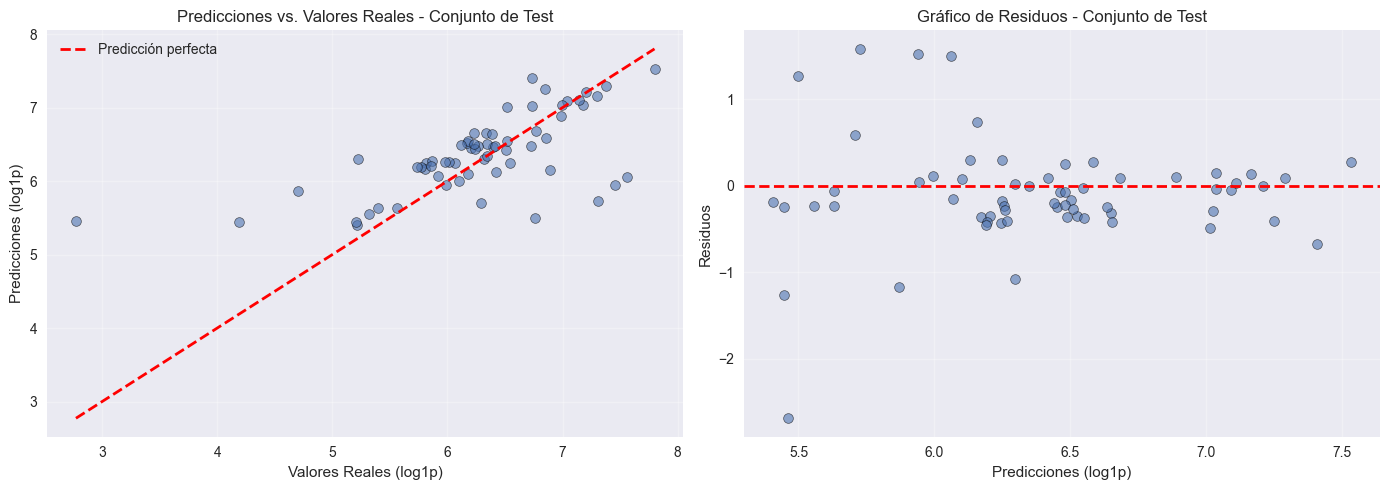


‚úÖ Actividad completada exitosamente!
üìä Mejor modelo: XGBoost
üìà MSE en Test: 0.3915 (vs Baseline: 0.68)
üéØ Mejora: 42.4%


In [22]:
# Visualizaci√≥n final: Predicciones vs. Valores Reales en conjunto de test

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gr√°fico 1: Scatter plot de predicciones vs reales
axes[0].scatter(ytest2, y_test_pred, alpha=0.6, edgecolors='k', linewidths=0.5)
axes[0].plot([ytest2.min(), ytest2.max()], [ytest2.min(), ytest2.max()], 'r--', lw=2, label='Predicci√≥n perfecta')
axes[0].set_xlabel('Valores Reales (log1p)')
axes[0].set_ylabel('Predicciones (log1p)')
axes[0].set_title('Predicciones vs. Valores Reales - Conjunto de Test')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Gr√°fico 2: Residuos
residuos = ytest2.values.flatten() - y_test_pred
axes[1].scatter(y_test_pred, residuos, alpha=0.6, edgecolors='k', linewidths=0.5)
axes[1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[1].set_xlabel('Predicciones (log1p)')
axes[1].set_ylabel('Residuos')
axes[1].set_title('Gr√°fico de Residuos - Conjunto de Test')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n‚úÖ Actividad completada exitosamente!")
print(f"üìä Mejor modelo: XGBoost")
print(f"üìà MSE en Test: {mse_test:.4f} (vs Baseline: {mse_baseline:.2f})")
print(f"üéØ Mejora: {((mse_baseline - mse_test)/mse_baseline * 100):.1f}%")

# **Fin de la Actividad de mercadotecnia en redes sociales**